In [1]:
#!python -m pip install matrixprofile

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matrixprofile as mp
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\raw.githubusercontent.com_matrix-profile-foundation_article-matrix-profile-intro_master_data_nyc_yellow_taxi_passenger_count_2018_hourly.csv')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df = df.set_index('pickup_datetime').sort_index()

In [4]:
df.head()

,passenger_count
pickup_datetime,
2018-01-01 00:00:00,28630
2018-01-01 01:00:00,32778
2018-01-01 02:00:00,27966
2018-01-01 03:00:00,21243
2018-01-01 04:00:00,14822


In [5]:
28630+32778

61408

In [6]:
df['passenger_count'].describe()

count     8760.000000
mean     18716.562671
std       8961.120977
min          3.000000
25%      11464.500000
50%      21502.500000
75%      25180.500000
max      38420.000000
Name: passenger_count, dtype: float64

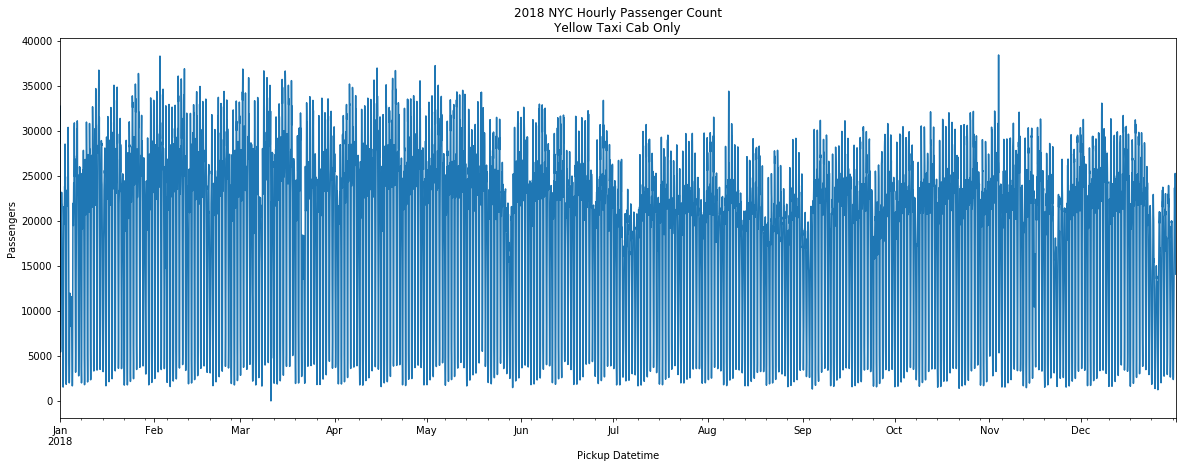

In [7]:
df.plot(figsize=(20,7), legend=None, title='2018 NYC Hourly Passenger Count\nYellow Taxi Cab Only')
plt.xlabel('Pickup Datetime')
plt.ylabel('Passengers')
plt.show()

In [8]:
windows = [
    ('4 Hours', 4),
    ('8 Hours', 8),
    ('12 Hours', 12),
    ('24 Hours', 24),
    ('7 Days', 7 * 24),
    ('30 Days', 30 * 24),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(df['passenger_count'].values, window_size)
    key = label
    profiles[key] = profile

In [9]:
profiles['4 Hours']

{'mp': array([0.03879974, 0.00808789, 0.00705083, ..., 0.03222055, 0.03158522,
        0.01043826]),
 'pi': array([5493, 6814, 5688, ..., 5945, 8537,  665]),
 'rmp': None,
 'rpi': None,
 'lmp': None,
 'lpi': None,
 'metric': 'euclidean',
 'w': 4,
 'ez': 0,
 'join': False,
 'sample_pct': 1,
 'data': {'ts': array([28630., 32778., 27966., ..., 24315., 18235., 14077.]),
  'query': None},
 'class': 'MatrixProfile',
 'algorithm': 'mpx'}

In [10]:
profiles['4 Hours']['mp']

array([0.03879974, 0.00808789, 0.00705083, ..., 0.03222055, 0.03158522,
       0.01043826])

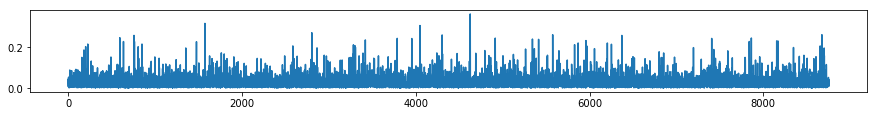

In [11]:
plt.figure(figsize=(15,1.5))
plt.plot(profiles['4 Hours']['mp'])

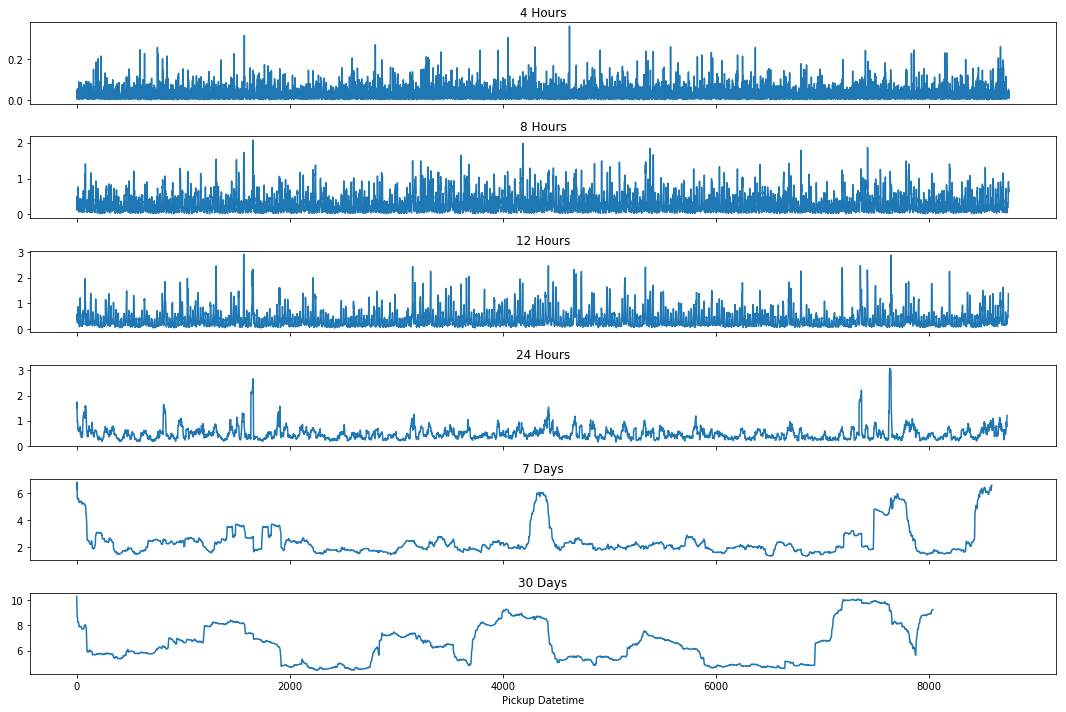

In [12]:
#Plot the signal data
fig, axes = plt.subplots(6,1,sharex=True,figsize=(15,10))

for ax_idx, window in enumerate(windows):
    key = window[0]
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

In [13]:
mp.discover.discords(profiles['4 Hours'], k=5)

{'mp': array([0.03879974, 0.00808789, 0.00705083, ..., 0.03222055, 0.03158522,
        0.01043826]),
 'pi': array([5493, 6814, 5688, ..., 5945, 8537,  665]),
 'rmp': None,
 'rpi': None,
 'lmp': None,
 'lpi': None,
 'metric': 'euclidean',
 'w': 4,
 'ez': 0,
 'join': False,
 'sample_pct': 1,
 'data': {'ts': array([28630., 32778., 27966., ..., 24315., 18235., 14077.]),
  'query': None},
 'class': 'MatrixProfile',
 'algorithm': 'mpx',
 'discords': array([4627, 1574, 4049, 2804, 8674])}

In [14]:
profiles['4 Hours']['w']

4

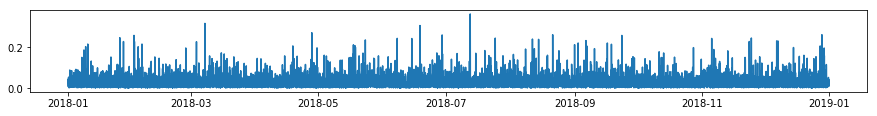

In [15]:
plt.figure(figsize=(15,1.5))
mp_adjusted = np.append(profiles['4 Hours']['mp'], np.zeros(profiles['4 Hours']['w'] - 1) + np.nan)
plt.plot(df.index.values,mp_adjusted)

In [16]:
for start_index in profiles['4 Hours']['discords']:
    print(start_index)

4627
1574
4049
2804
8674


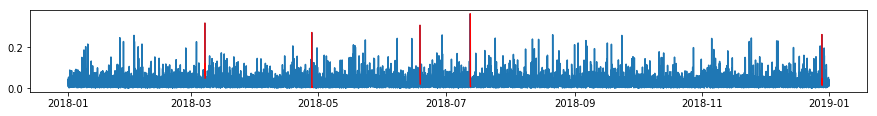

In [17]:
plt.figure(figsize=(15,1.5))
plt.plot(df.index.values,mp_adjusted)
for start_index in profiles['4 Hours']['discords']:
        x = df.index.values[start_index:start_index+profiles['4 Hours']['w']]
        y = mp_adjusted[start_index:start_index+profiles['4 Hours']['w']]
        plt.plot(x, y, c='r')

In [18]:
windows = [
    ('4 Hours', 4),
    ('8 Hours', 8),
    ('12 Hours', 12),
    ('24 Hours', 24),
    ('7 Days', 7 * 24),
    ('30 Days', 30 * 24),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(df['passenger_count'].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

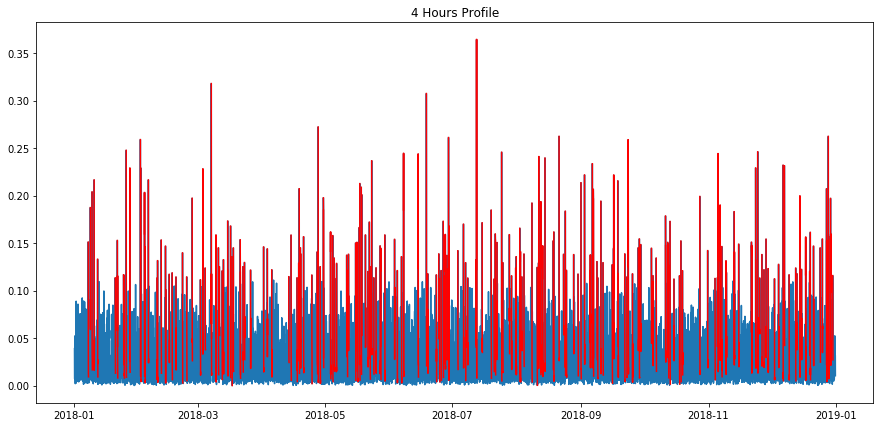

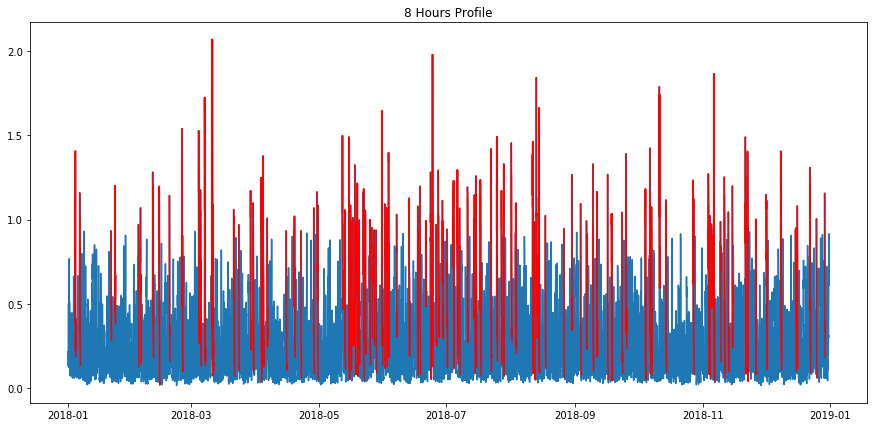

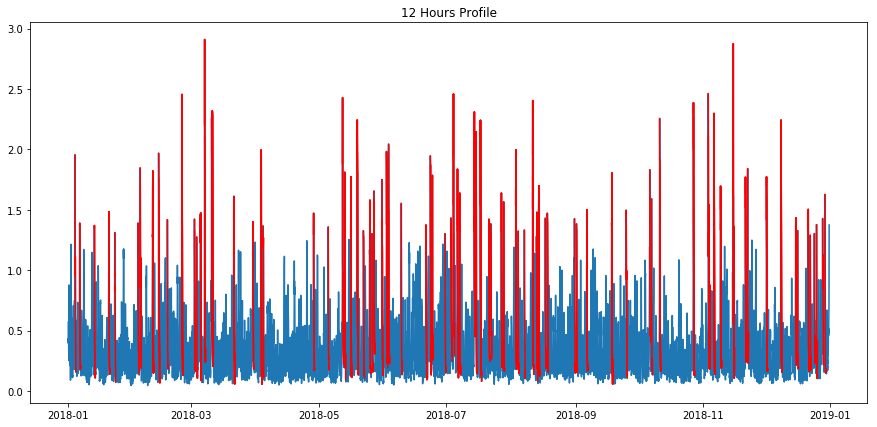

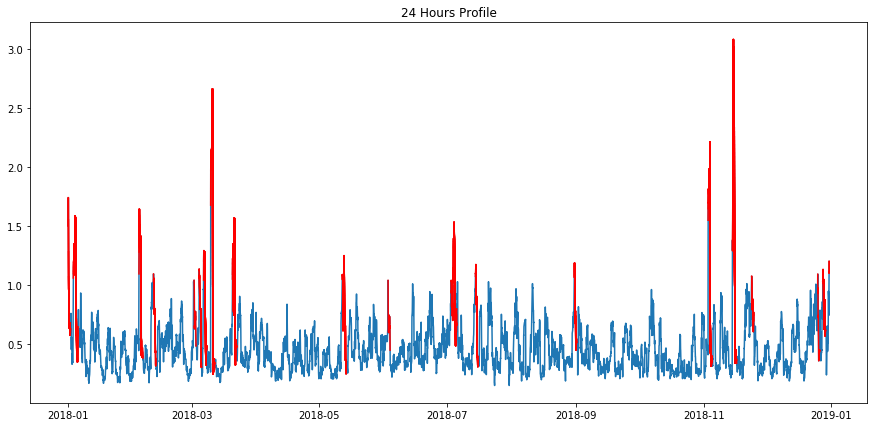

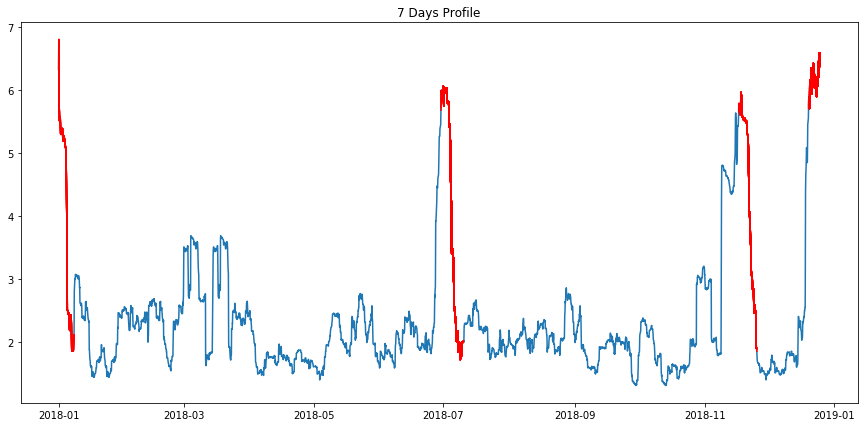

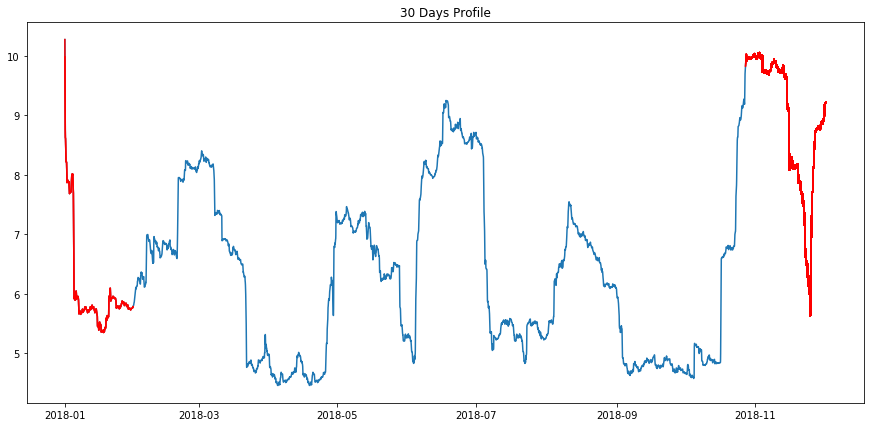

In [19]:
for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=250)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
    
    plt.figure(figsize=(15, 7))
    ax = plt.plot(df.index.values, mp_adjusted)
    plt.title(key)
    
    for start_index in profiles[key]['discords']:
        x = df.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]
        plt.plot(x, y, c='r')
    
    plt.show()

In [20]:
key = '24 Hours Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
df['24 Hours Profile'] = mp_adjusted

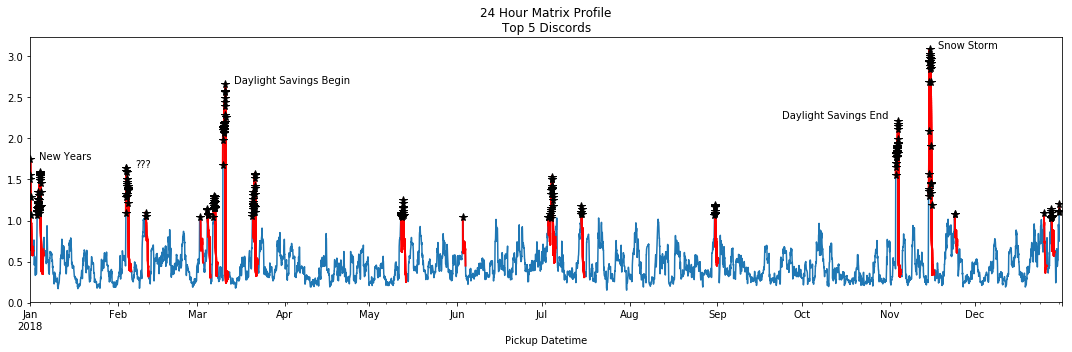

In [21]:
ax = df[key].plot(title='24 Hour Matrix Profile\nTop 5 Discords', figsize=(15,5))

for discord in profile['discords']:
    df.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

df.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.text('01-04-2018', 1.75, 'New Years', color='black')
plt.text('02-07-2018', 1.65, '???', color='black')
plt.text('03-14-2018', 2.675, 'Daylight Savings Begin', color='black')
plt.text('9-24-2018', 2.25, 'Daylight Savings End', color='black')
plt.text('11-18-2018', 3.1, 'Snow Storm', color='black')
plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()


In [22]:
profiles

{'4 Hours Profile': {'mp': array([0.03879974, 0.00808789, 0.00705083, ..., 0.03222055, 0.03158522,
         0.01043826]),
  'pi': array([5493, 6814, 5688, ..., 5945, 8537,  665]),
  'rmp': None,
  'rpi': None,
  'lmp': None,
  'lpi': None,
  'metric': 'euclidean',
  'w': 4,
  'ez': 0,
  'join': False,
  'sample_pct': 1,
  'data': {'ts': array([28630., 32778., 27966., ..., 24315., 18235., 14077.]),
   'query': None},
  'class': 'MatrixProfile',
  'algorithm': 'mpx',
  'discords': array([4627, 1574, 4049, 2804, 8674, 5576, 4304,  758, 6372,  595, 7862,
         4915, 3787, 7406, 3955, 5343, 5414, 3420, 5959, 8154, 8169, 7838,
          637,  763, 1477, 5869, 6205,  226,  850, 6252, 5828, 3283, 3300,
         2586, 8654, 5970,  202,  806, 3306, 8347, 7196, 2864, 1354, 8700,
         5971, 6057, 5365, 5264, 7430,  182, 3786, 4795, 2865, 5648, 7591,
         6801, 1763, 4243, 6853, 3393, 4691, 4476, 1796, 4308, 3276, 5124,
         2947, 5516, 8467,  805, 8702, 4842, 4267, 5004, 3348, 3571,